##卷积神经网络（CNN）
本教程演示了如何训练简单的卷积神经网络（CNN）对CIFAR图像进行分类。由于本教程使用Keras Sequential API，因此创建和训练模型仅需几行代码。

###导入TensorFlow

In [2]:
from __future__ import absolute_import,division,print_function,unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt


TensorFlow 2.x selected.


###下载并准备CIFAR10数据集
CIFAR10数据集包含10类60,000张彩色图像，每类6,000张图像。数据集分为50,000个训练图像和10,000个测试图像。这些类是互斥的，并且它们之间没有重叠。

In [3]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

#Normalize pixel values to be between 0 and 1
train_images,test_images = train_images/255.0,test_images /255.0

170500096/170498071 [==============================] - 4s 0us/step


###验证数据
为了验证数据集看起来正确，让我们绘制训练集中的前25张图像，并在每个图像下方显示类别名称。

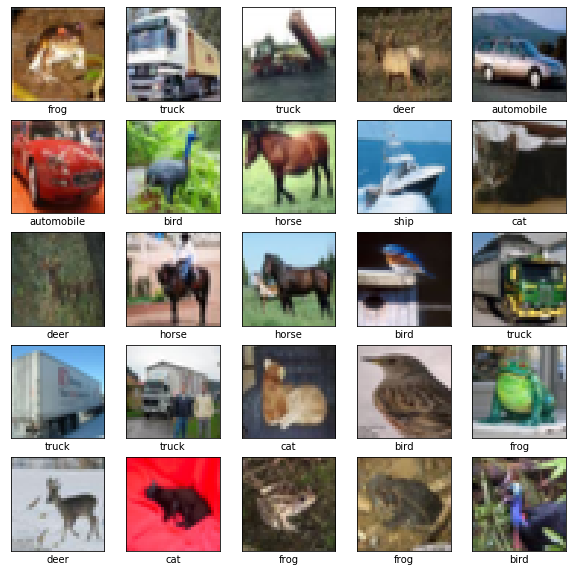

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)

  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

###创建卷积基础
下面的6行代码使用一种常见的模式定义卷积基础：Conv2D和MaxPooling2D层的堆栈。

作为输入，CNN采用形状张量（image_height，image_width，color_channels），而忽略批大小。如果您不熟悉这些尺寸，则color_channels是指（R，G，B）。在此示例中，您将配置CNN以处理形状（32、32、3）的输入，这是CIFAR图像的格式。您可以通过将参数传递input_shape给我们的第一层来实现。

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

到目前为止，让我们展示模型的架构。

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


在上面，您可以看到每个Conv2D和MaxPooling2D图层的输出是一个3D张量形状（高度，宽度，通道）。随着您深入网络，宽度和高度尺寸趋于缩小。每个Conv2D层的输出通道数由第一个参数（例如32或64）控制。通常，随着宽度和高度的缩小，您可以（通过计算）在每个Conv2D层中添加更多的输出通道。

###在顶部添加密集层
为了完成我们的模型，您将从卷积基数（形状为（3，3，64））中最后一个输出张量馈入一个或多个Dense层以执行分类。密集层将矢量作为输入（一维），而当前输出是3D张量。首先，将3D输出展平（或展开）为1D，然后在顶部添加一个或多个Dense层。CIFAR具有10个输出类，因此您使用具有10个输出和softmax激活的最终Dense层。

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

这是我们模型的完整架构。

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

如您所见，我们的（3，3，64）输出在经过两个密集层之前被展平为形状为（576）的向量。

###编译训练模型

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images,train_labels,epochs=10,
                    validation_data=(test_images,test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 13s 264us/sample - loss: 1.5543 - accuracy: 0.4339 - val_loss: 1.3479 - val_accuracy: 0.5041
Epoch 2/10
50000/50000 [==============================] - 7s 130us/sample - loss: 1.1960 - accuracy: 0.5759 - val_loss: 1.1604 - val_accuracy: 0.5830
Epoch 3/10
50000/50000 [==============================] - 6s 121us/sample - loss: 1.0448 - accuracy: 0.6307 - val_loss: 1.1349 - val_accuracy: 0.6013
Epoch 4/10
50000/50000 [==============================] - 6s 121us/sample - loss: 0.9490 - accuracy: 0.6694 - val_loss: 0.9719 - val_accuracy: 0.6596
Epoch 5/10
50000/50000 [==============================] - 6s 122us/sample - loss: 0.8762 - accuracy: 0.6920 - val_loss: 0.9353 - val_accuracy: 0.6722
Epoch 6/10
50000/50000 [==============================] - 6s 122us/sample - loss: 0.8168 - accuracy: 0.7148 - val_loss: 0.8786 - val_accuracy: 0.6994
Epoch 7/10
50000/50000 [=========================

###评估模型

10000/10000 - 1s - loss: 0.8932 - accuracy: 0.7006


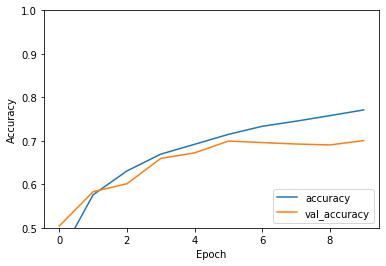

In [10]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)

In [11]:
print(test_acc)

0.7006


使用模型对测试数据进行预测

In [12]:
i = 0
test_pre = model.predict(test_images)
test_pre[i]

array([1.0886600e-03, 2.5274246e-03, 2.7919613e-04, 8.5158628e-01,
       5.4468960e-04, 1.8405247e-02, 2.2735693e-03, 6.5007695e-04,
       1.2185416e-01, 7.9076749e-04], dtype=float32)

看一张图是什么样的

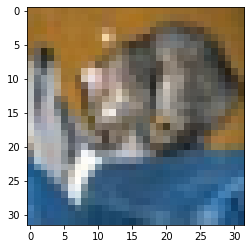

In [13]:
plt.imshow(test_images[i])

查看一下预测的数据和测试数据的真实标签是否一致
>注意真实标签出来的数据是个数组

In [14]:
import numpy as np

print(np.argmax(test_pre[i]),test_labels[i])
#test_labels[i]

3 [3]


多显示一些数据，看看是预测的数据如何

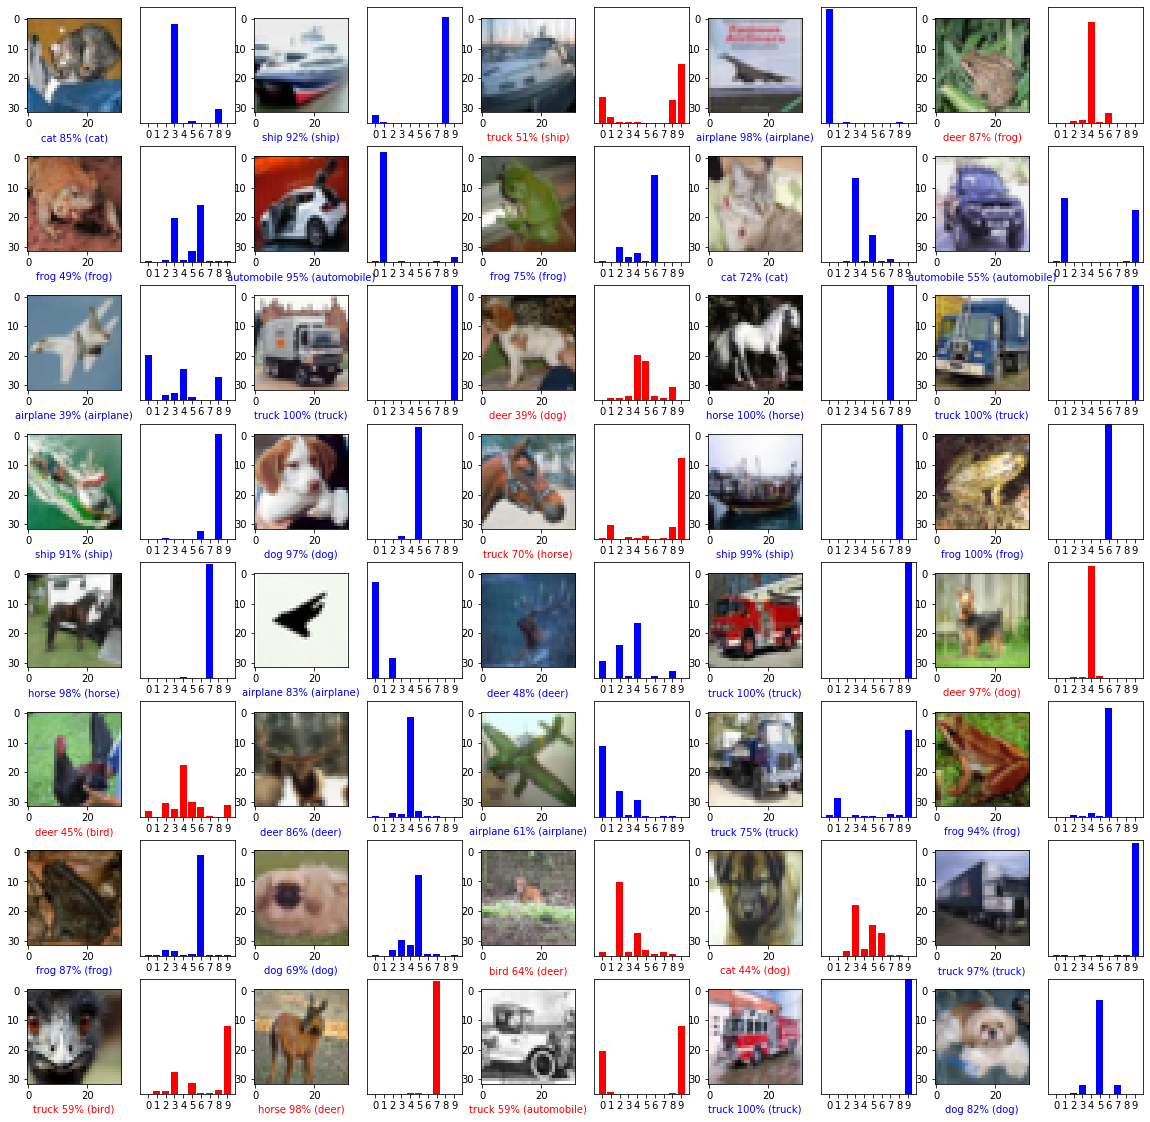

In [16]:
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols,2.5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plt.imshow(test_images[i])
  predicted_label = np.argmax(test_pre[i])
  if predicted_label == test_labels[i]:
    color = 'blue'
  else:
    color = 'red'
  test_label = test_labels[i]
  plt.xlabel("{} {:2.0f}% ({})".format(
      class_names[predicted_label],
      100*np.max(test_pre[i]),
      class_names[test_label[0]]),color=color)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  
  plt.bar(range(10),test_pre[i],color=color)
  plt.ylim([0,1])
  